In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 3.0

In [57]:
try:
    with open('./sunspots.txt', 'r') as file:
        data_array = np.genfromtxt(file,delimiter='\t')
except FileNotFoundError:
    print("Error: The file 'sunspots.txt' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

month_array = np.zeros(len(data_array))

n_sunspots_array = np.zeros(len(data_array))

for i in range(len(data_array)):
    month_array[i]=data_array[i][0]
    n_sunspots_array[i]=data_array[i][1]

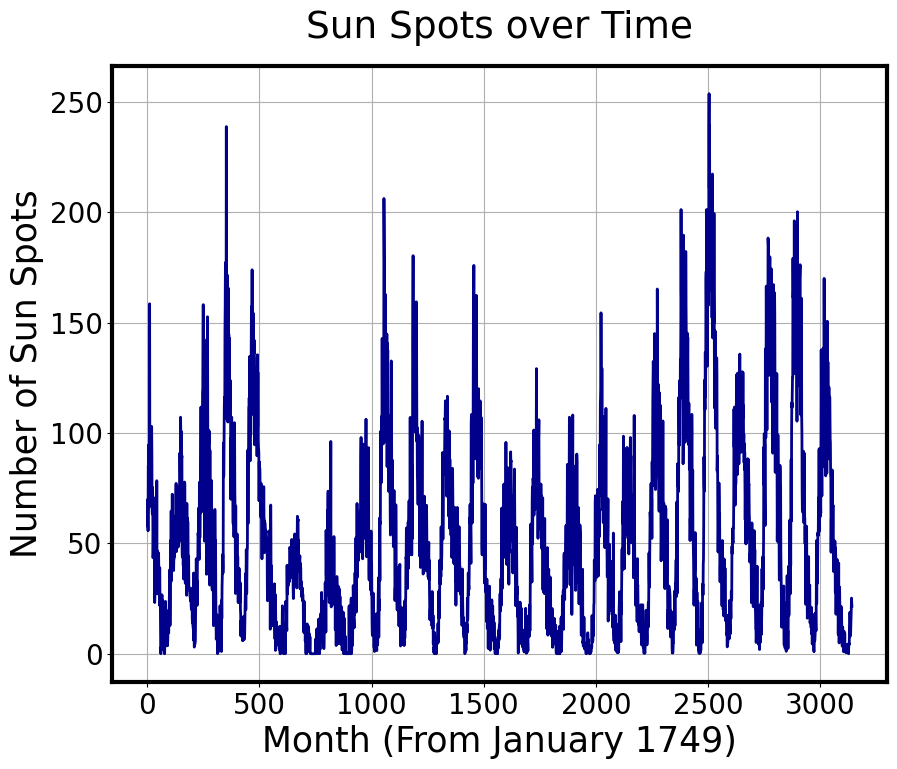

In [58]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(month_array,n_sunspots_array,lw=2,color='darkblue')
plt.xlabel(r'Month (From January 1749)',fontsize=25)
plt.ylabel(r'Number of Sun Spots',fontsize=25)
plt.title(r'Sun Spots over Time',fontsize=27,pad='20')
plt.grid(True,which='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(labelbottom=True)
plt.tick_params(labelleft=True)

plt.savefig('./hw3_p1_sun_spots_over_time',bbox_inches="tight")

[2.66338157e+10 4.38551689e+08 2.84356855e+08 ... 1.89583208e+05
 7.46220529e+05 1.14646920e+06]


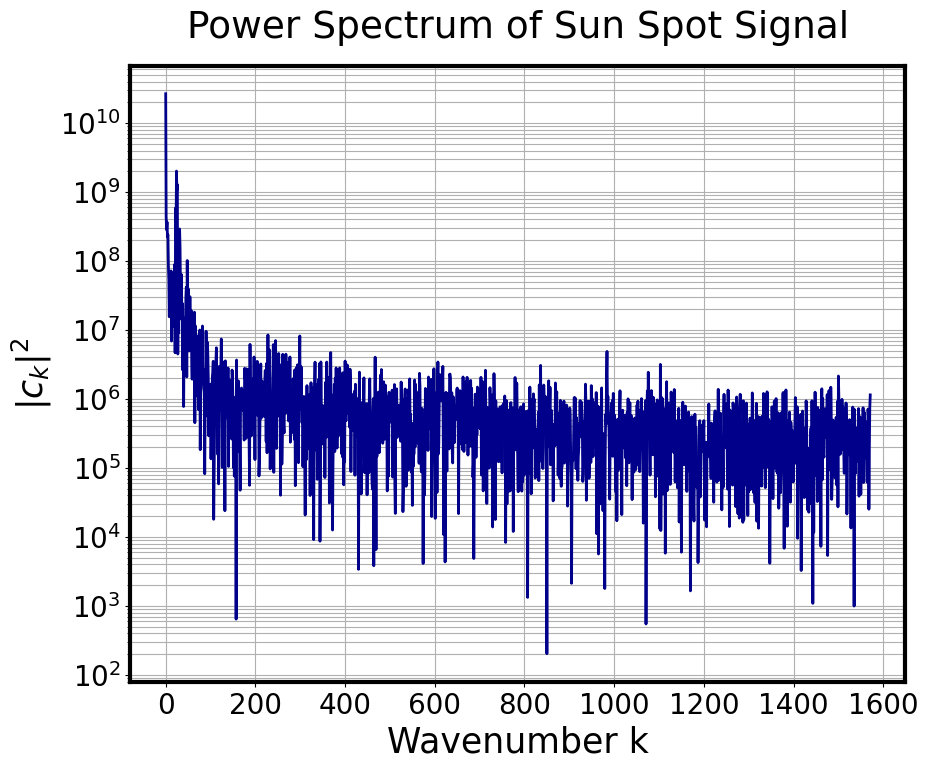

In [59]:
ft_sunspots=np.fft.rfft(n_sunspots_array) # use the 'real' fourier transform, which is relevant since our data here is real, not complex

k_array=np.linspace(0,len(ft_sunspots)-1,len(ft_sunspots)) 

plt.figure(figsize=(10,8),dpi=100)
plt.semilogy(k_array,abs(ft_sunspots)**2,lw=2,color='darkblue')
plt.xlabel(r'Wavenumber k',fontsize=25) # note that the wavenumber here is equal to the length divided by the corresponding 'wavelength' of the sine wave represented, aka L/lambda; 
plt.ylabel(r'$|c_k|^2$',fontsize=25)    # so, it represents the number of nodes this wave would have in the sampling interval
plt.title(r'Power Spectrum of Sun Spot Signal',fontsize=27,pad='20')
plt.grid(True,which='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(labelbottom=True)
plt.tick_params(labelleft=True)

plt.savefig('./hw3_p1_power_spectrum',bbox_inches="tight")

print(abs(ft_sunspots)**2)

In [60]:
ft_sunspots_non_dc_abs = abs(ft_sunspots[1:])**2 # get rid of the k=0 term which isn't relevant for periodicity
max_ck_sqr = np.max(ft_sunspots_non_dc_abs)
index_ckmax = np.where(ft_sunspots_non_dc_abs==max_ck_sqr)[0][0]

N_samples = len(month_array) # the number of samples, 1 sample per month, 3143 samples

k_cksqr_max = k_array[index_ckmax+1]
print(f'The maximum of abs(c_k)**2 occurs at k = {round(k_cksqr_max,5)} which corresponds to a:\nfrequency of {round(k_cksqr_max/N_samples,5)} months^(-1) and a period of {round(N_samples/k_cksqr_max,5)} months')


The maximum of abs(c_k)**2 occurs at k = 24.0 which corresponds to a:
frequency of 0.00764 months^(-1) and a period of 130.95833 months
